ROLL NO: CTAI-009

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from collections import Counter
import matplotlib.pyplot as plt


In [2]:
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names
class_names = data.target_names


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


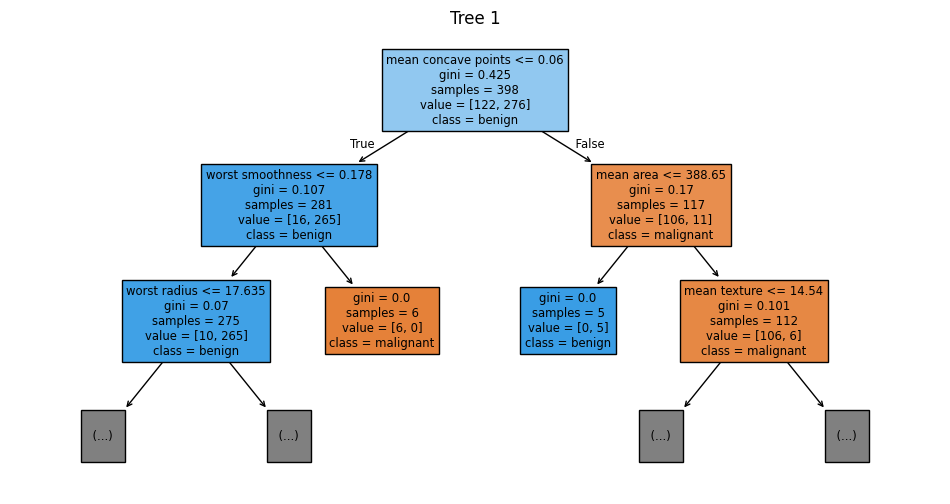

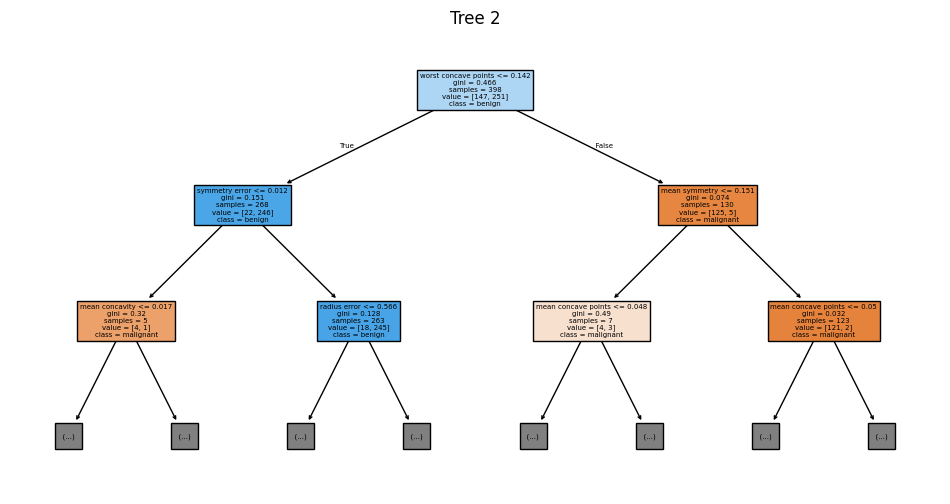

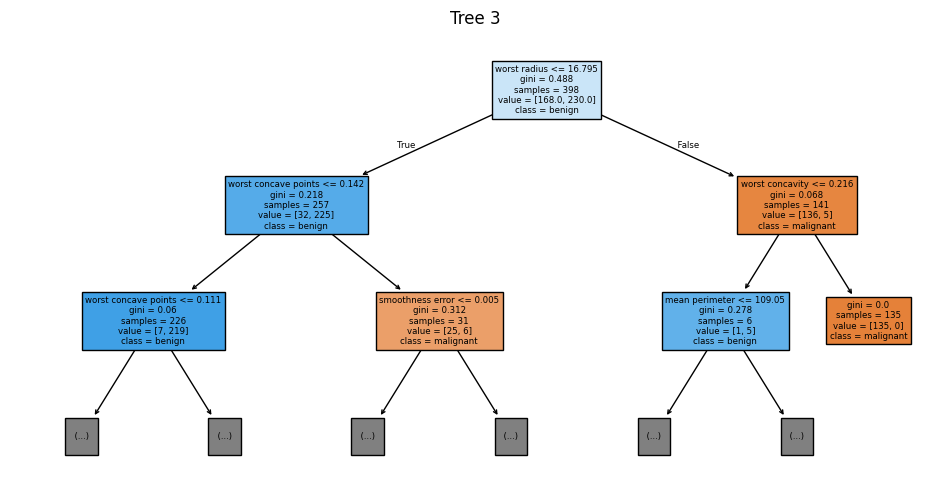

In [7]:
 class RandomForestScratch:
    def __init__(self, n_estimators=5, max_depth=None, max_features=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.trees = []

    def bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, size=n_samples, replace=True)
        return X[indices], y[indices]

    def fit(self, X, y):
        self.trees = []
        for i in range(self.n_estimators):
            X_sample, y_sample = self.bootstrap_sample(X, y)
            tree = DecisionTreeClassifier(max_depth=self.max_depth, max_features=self.max_features, random_state=i)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

            # Plot each individual tree
            plt.figure(figsize=(12, 6))
            plot_tree(tree, feature_names=feature_names, class_names=class_names, filled=True, max_depth=2)
            plt.title(f"Tree {i + 1}")
            plt.show()

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [Counter(tree_pred).most_common(1)[0][0] for tree_pred in tree_preds]
        return np.array(y_pred)
rf = RandomForestScratch(n_estimators=3, max_depth=4, max_features=5)
rf.fit(X_train, y_train)

In [8]:
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9122807017543859
Confusion Matrix:
 [[ 56   7]
 [  8 100]]
